This program examines, cleans, and analyzes data regarding COVID-19

The first date in the data set is: 1/22/20
The last date in the data set is: 5/25/20 



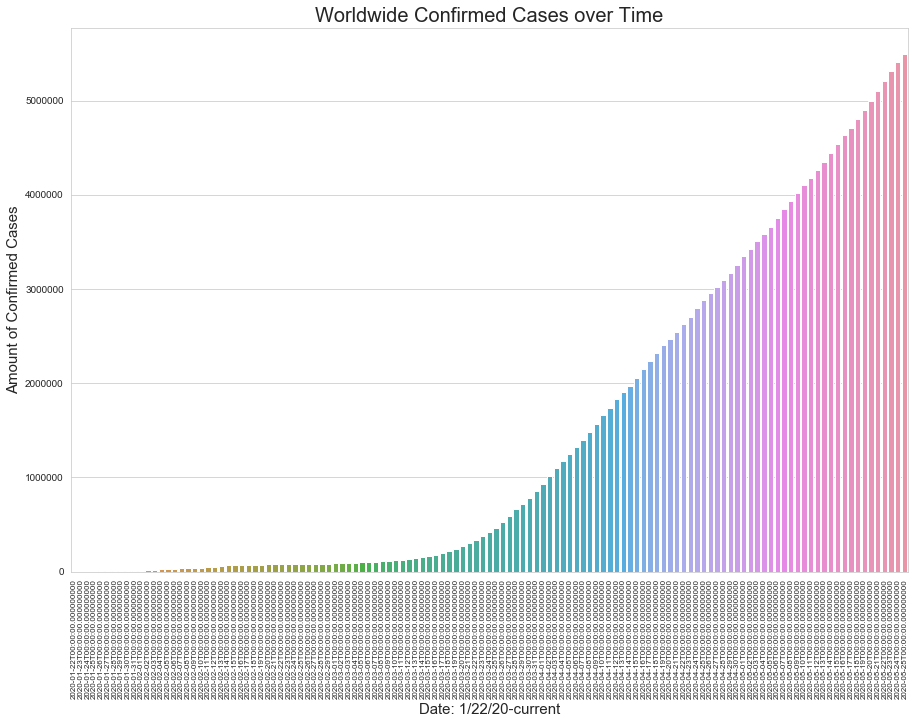

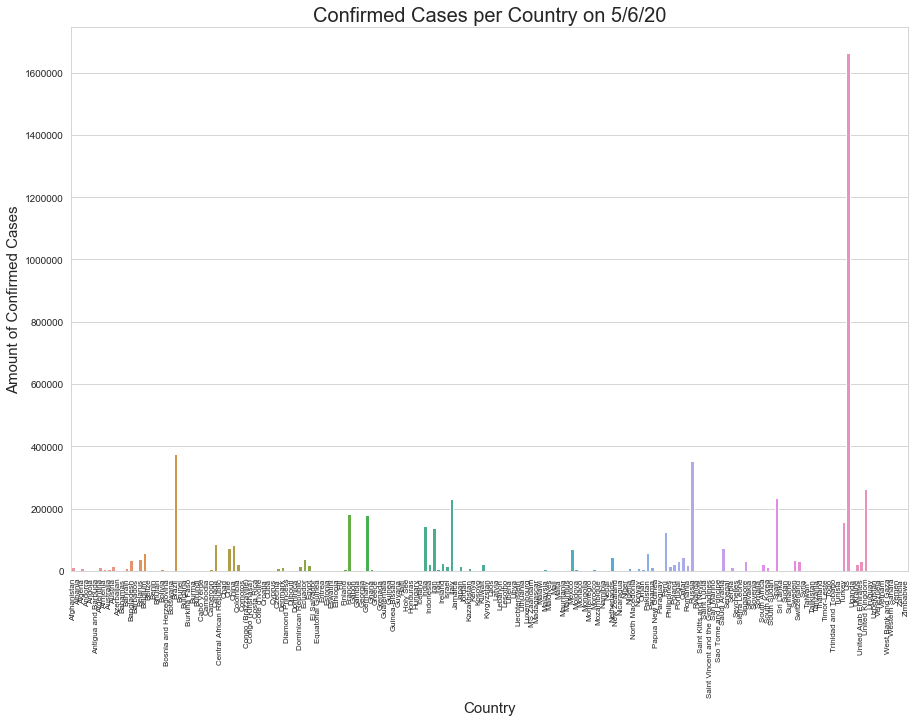

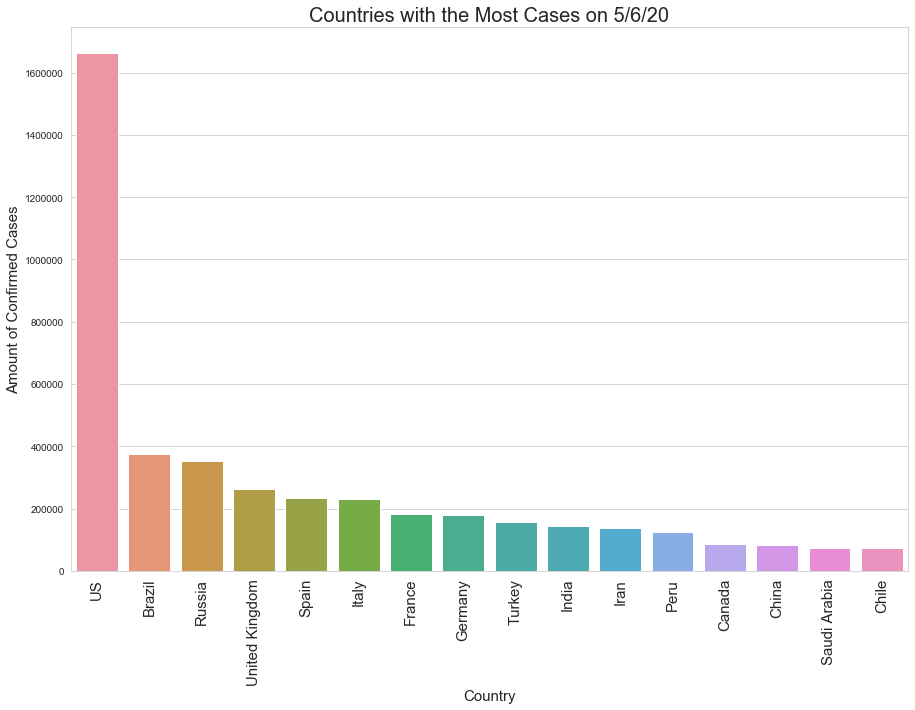

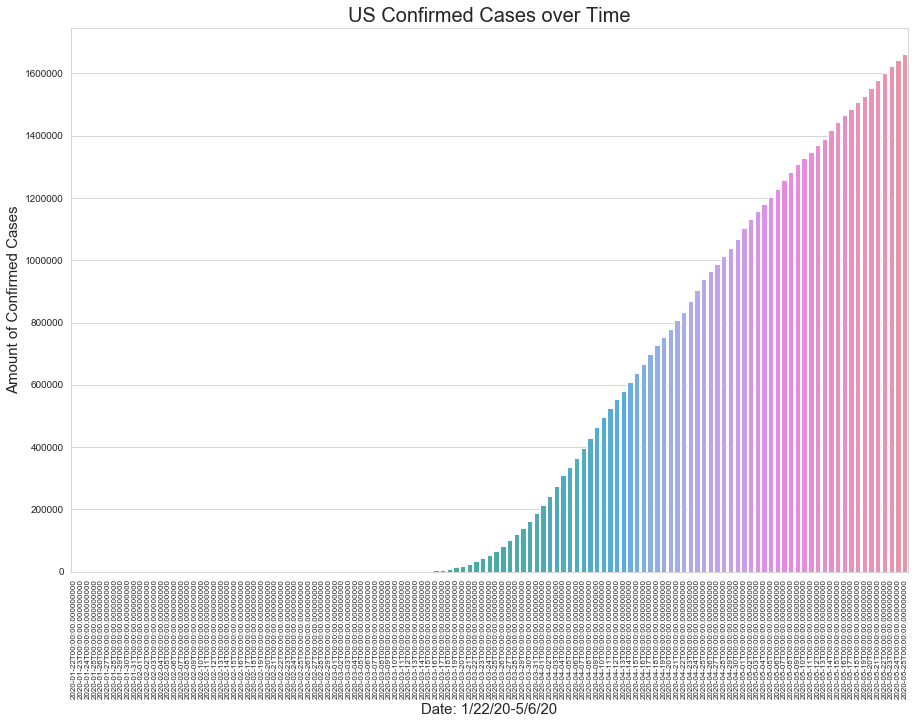

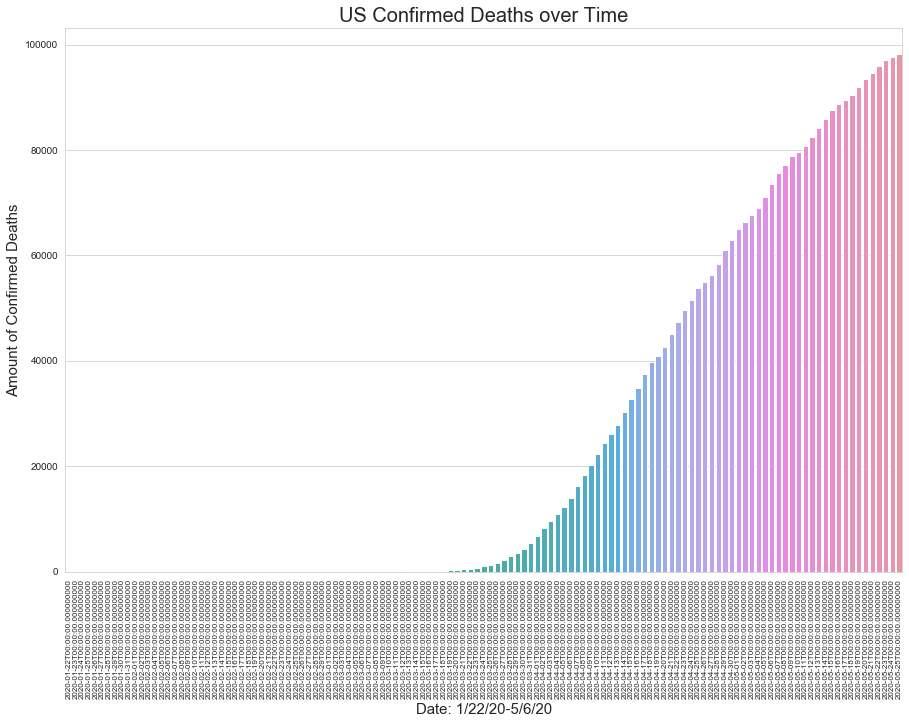

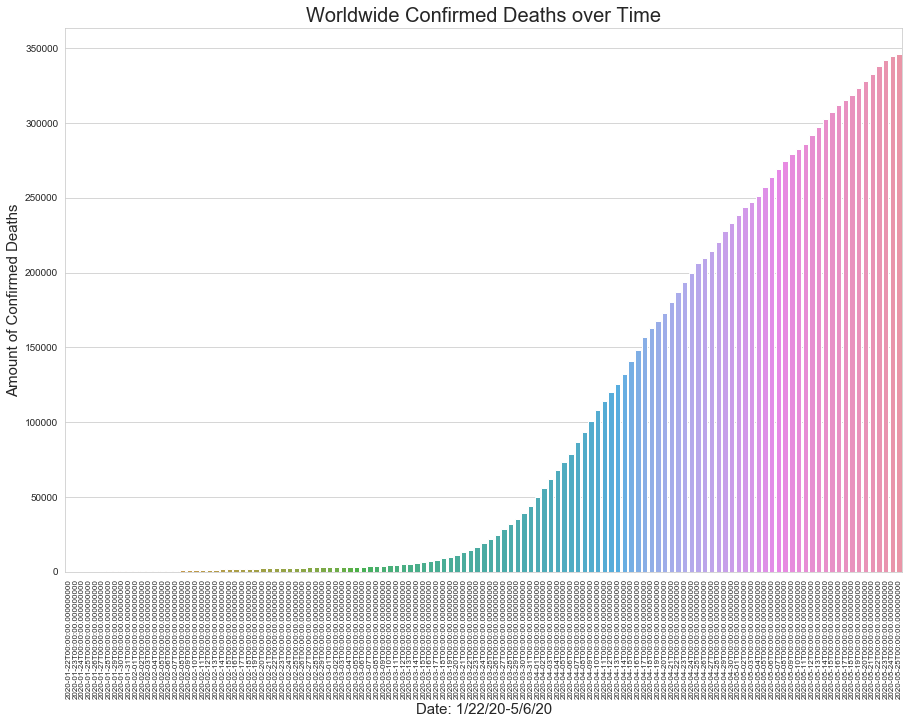

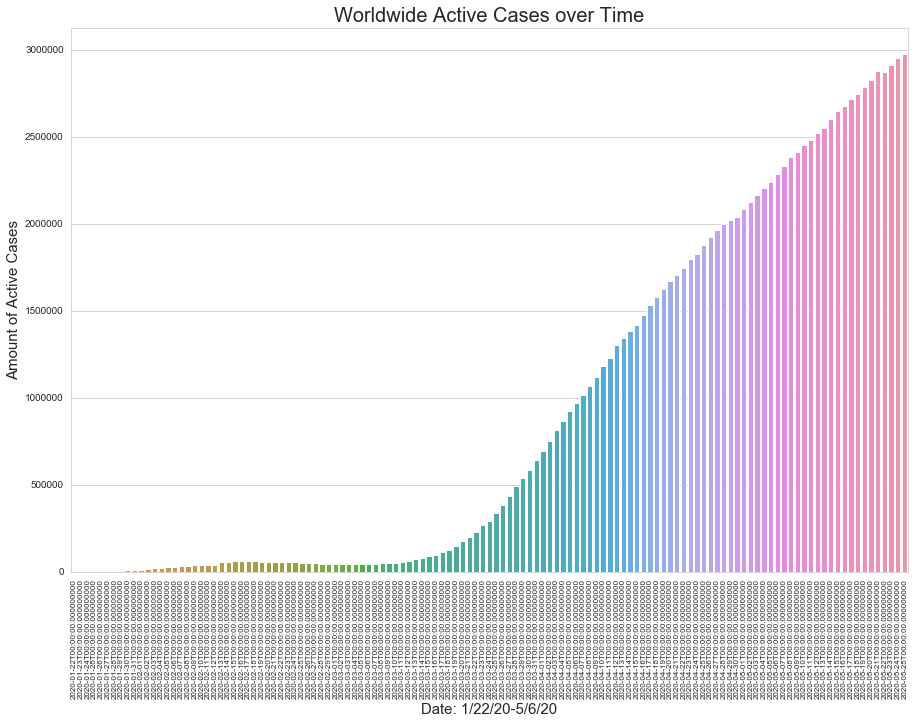

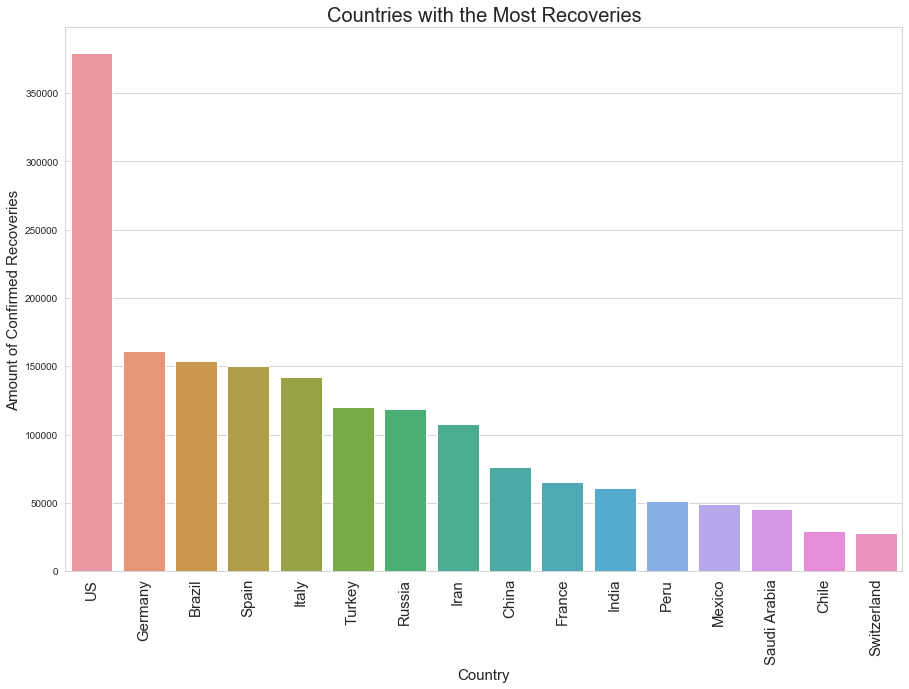

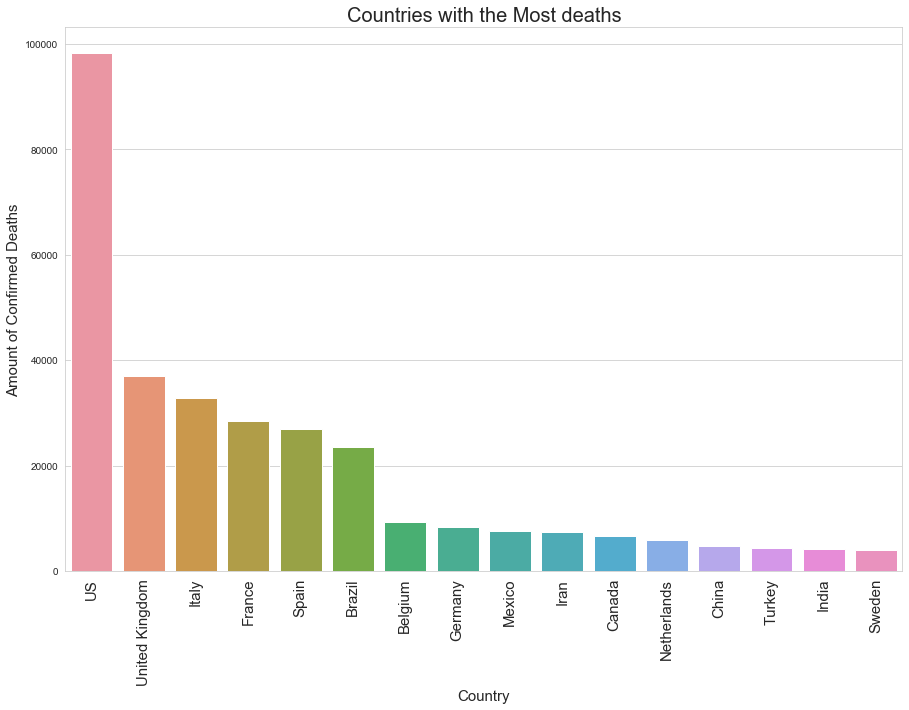

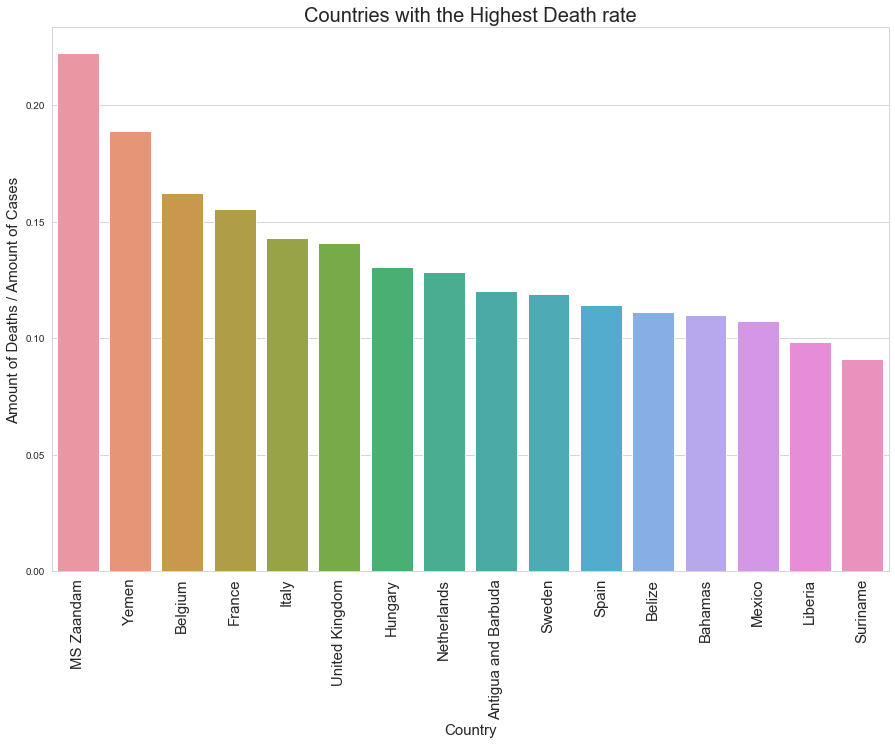

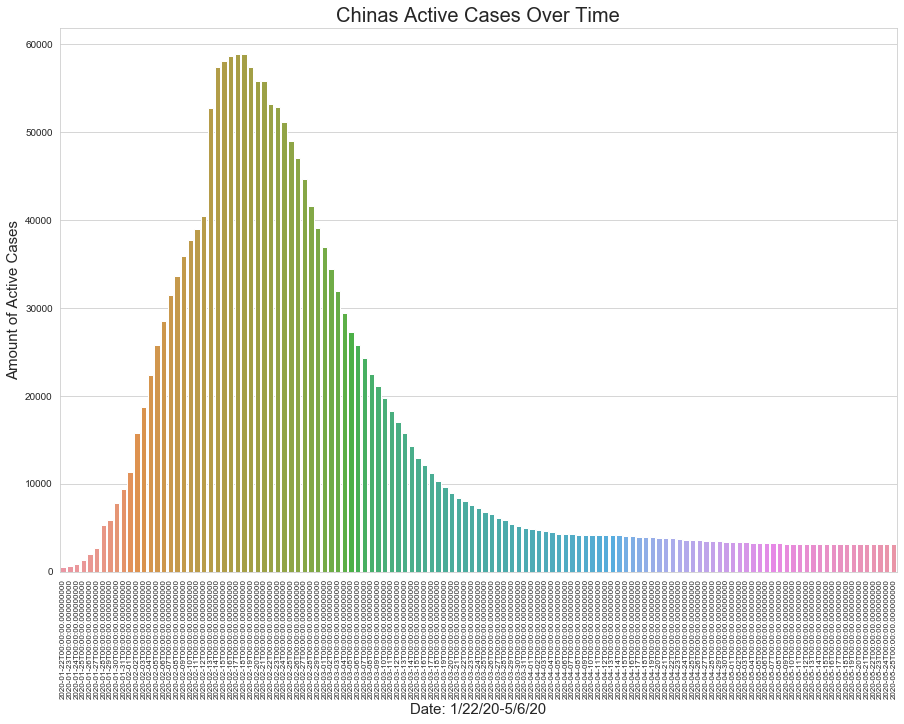

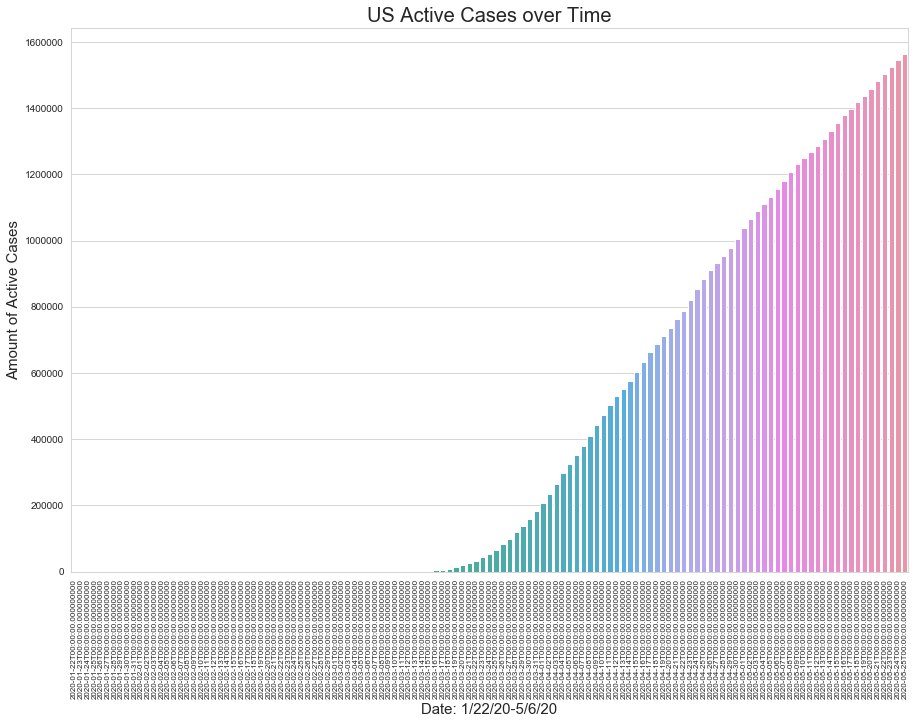

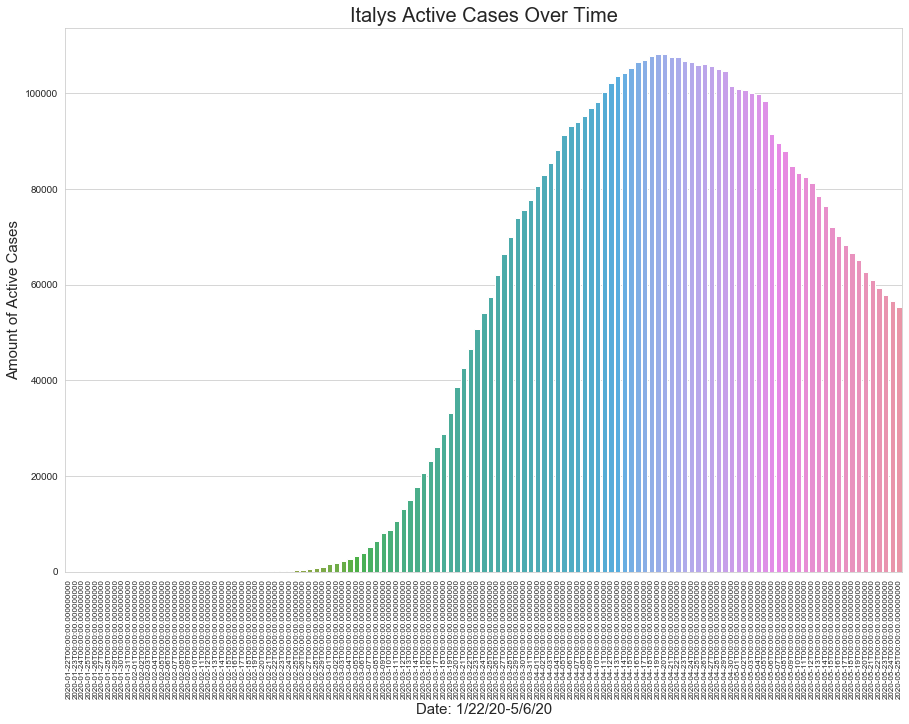

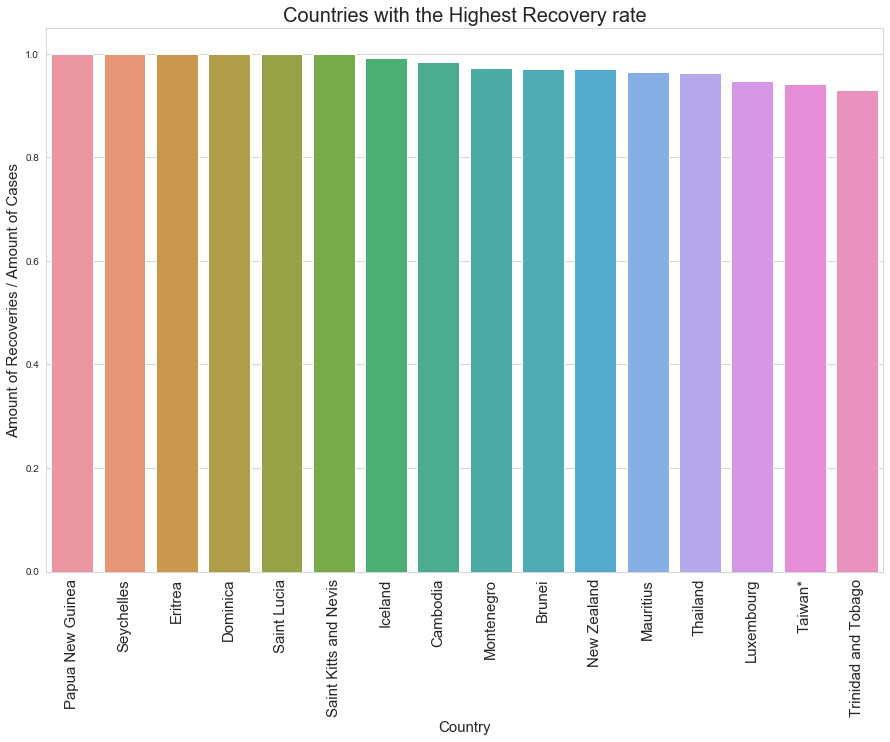

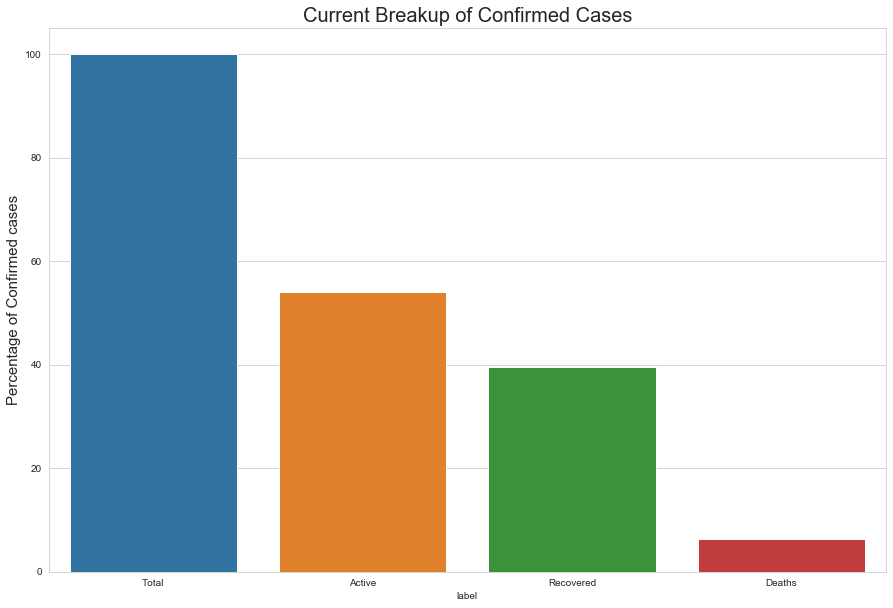

In [2]:
#author: Zack Edwards
#Title: COVID-19 data set analysis

from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nltk
import string
import numpy as np
import re


data = pd.read_csv('complete clean covid data.csv')
#data.head()
#data.columns
#data.info()
#data.describe(include = 'object') #gives info on the total number of entries and unique countries/provinces

us_data = pd.read_csv('usa covid data.csv')

print('This program examines, cleans, and analyzes data regarding COVID-19')

print('\nThe first date in the data set is:',data.iloc[0].at['Date'])
print('The last date in the data set is:',data.iloc[-1].at['Date'], '\n')

#rename all the columns so they are standardized and easier to call
data.rename(columns={'Date':'date'}, inplace=True)
data.rename(columns={'Province/State':'state'}, inplace=True)
data.rename(columns={'Country/Region':'country'}, inplace=True)
data.rename(columns={'Lat':'lat', 'Long':'long'}, inplace=True)
data.rename(columns={'Confirmed': 'confirmed'}, inplace=True)
data.rename(columns={'Deaths':'deaths'}, inplace=True)
data.rename(columns={'Recovered':'recovered'}, inplace=True)
us_data.rename(columns={'Date':'date'}, inplace=True)
us_data.rename(columns={'Province/State':'state'}, inplace=True)
us_data.rename(columns={'Country/Region':'country'}, inplace=True)
us_data.rename(columns={'Lat':'lat', 'Long':'long'}, inplace=True)
us_data.rename(columns={'Confirmed': 'confirmed'}, inplace=True)
us_data.rename(columns={'Deaths':'deaths'}, inplace=True)
us_data.rename(columns={'Recovered':'recovered'}, inplace=True)

#create a column for active cases
data['active'] = data['confirmed'] - data['deaths'] - data['recovered']
us_data['active'] = us_data['confirmed'] - us_data['deaths']

#graph 1: wordwide cases per day
worldwide_cases = data.groupby('date')['date','confirmed'].sum().reset_index()
worldwide_cases['date'] = pd.to_datetime(worldwide_cases['date'])
fig1, ax1 = plt.subplots(figsize=(15,10))
sns.set_style("whitegrid")
sns.barplot(x=worldwide_cases.date,y=worldwide_cases.confirmed,ax=ax1)
sns.set_style("whitegrid")
plt.title('Worldwide Confirmed Cases over Time',fontsize=20)
plt.ylabel("Amount of Confirmed Cases",fontsize=15)
plt.xlabel("Date: 1/22/20-current",fontsize=15)
plt.xticks(rotation = 90 ,fontsize = 8)
plt.show()

#graph 2: amount of current confirmed cases per country
#Creating a seperate data frame with the current values for active cases
current = data[data['date'] == data.iloc[-1].at['date']]
current_world = current.groupby('country')['confirmed','active','deaths','recovered'].sum().reset_index()
fig2, ax2 = plt.subplots(figsize=(15,10))
sns.barplot(x=current_world.country,y=current_world.confirmed,ax=ax2)
sns.set_style("whitegrid")
plt.title('Confirmed Cases per Country on 5/6/20',fontsize=20)
plt.ylabel("Amount of Confirmed Cases",fontsize=15)
plt.xlabel("Country",fontsize=15)
plt.xticks(rotation = 90 ,fontsize = 8)
plt.show()

#graph 3: 15 countries with the highest number of confirmed cases
top_15 = current_world.sort_values(by='confirmed',ascending=False)
fig3, ax3 = plt.subplots(figsize=(15,10))
sns.barplot(x=top_15[:16].country,y=top_15.confirmed,ax=ax3)
plt.title('Countries with the Most Cases on 5/6/20',fontsize=20)
plt.ylabel("Amount of Confirmed Cases",fontsize=15)
plt.xlabel("Country",fontsize=15)
plt.xticks(rotation = 90 ,fontsize = 15)
plt.show()

#graph 4: US confirmed cases per day
us_cases = us_data.groupby('date')['date','confirmed'].sum().reset_index()
us_cases['date'] = pd.to_datetime(us_cases['date'])
fig4, ax4 = plt.subplots(figsize=(15,10))
sns.barplot(x=us_cases.date,y=us_cases.confirmed,ax=ax4)
plt.title('US Confirmed Cases over Time',fontsize=20)
plt.ylabel("Amount of Confirmed Cases",fontsize=15)
plt.xlabel("Date: 1/22/20-5/6/20",fontsize=15)
plt.xticks(rotation = 90 ,fontsize = 8)
plt.show()

#graph 5: US deaths per day
us_deaths = us_data.groupby('date')['date','deaths'].sum().reset_index()
us_deaths['date'] = pd.to_datetime(us_deaths['date'])
fig5, ax5 = plt.subplots(figsize=(15,10))
sns.barplot(x=us_deaths.date,y=us_deaths.deaths,ax=ax5)
plt.title('US Confirmed Deaths over Time',fontsize=20)
plt.ylabel("Amount of Confirmed Deaths",fontsize=15)
plt.xlabel("Date: 1/22/20-5/6/20",fontsize=15)
plt.xticks(rotation = 90 ,fontsize = 8)
plt.show()

#graph 6: wordwide deaths per day
worldwide_deaths = data.groupby('date')['date','deaths'].sum().reset_index()
worldwide_deaths['date'] = pd.to_datetime(worldwide_deaths['date'])
fig6, ax6 = plt.subplots(figsize=(15,10))
sns.barplot(x=worldwide_deaths.date,y=worldwide_deaths.deaths,ax=ax6)
plt.title('Worldwide Confirmed Deaths over Time',fontsize=20)
plt.ylabel("Amount of Confirmed Deaths",fontsize=15)
plt.xlabel("Date: 1/22/20-5/6/20",fontsize=15)
plt.xticks(rotation = 90 ,fontsize = 8)
plt.show()

#graph 7: worldwide active cases per day
active_cases = data.groupby('date')['date','active'].sum().reset_index()
active_cases['date'] = pd.to_datetime(active_cases['date'])
fig7, ax7 = plt.subplots(figsize=(15,10))
sns.barplot(x=active_cases.date,y=active_cases.active,ax=ax7)
plt.title('Worldwide Active Cases over Time',fontsize=20)
plt.ylabel("Amount of Active Cases",fontsize=15)
plt.xlabel("Date: 1/22/20-5/6/20",fontsize=15)
plt.xticks(rotation = 90 ,fontsize = 8)
plt.show()

#graph 8: 15 countries with the highest number of recovered cases
world_recovered = current_world.sort_values(by='recovered',ascending=False)
fig8, ax8 = plt.subplots(figsize=(15,10))
sns.barplot(x=world_recovered[:16].country,y=world_recovered.recovered,ax=ax8)
plt.title('Countries with the Most Recoveries',fontsize=20)
plt.ylabel("Amount of Confirmed Recoveries",fontsize=15)
plt.xlabel("Country",fontsize=15)
plt.xticks(rotation = 90 ,fontsize = 15)
plt.show()

#graph 9: 15 countries with the highest number of deaths
world_deaths = current_world.sort_values(by='deaths',ascending=False)
fig9, ax9 = plt.subplots(figsize=(15,10))
sns.barplot(x=world_deaths[:16].country,y=world_deaths.deaths,ax=ax9)
plt.title('Countries with the Most deaths',fontsize=20)
plt.ylabel("Amount of Confirmed Deaths",fontsize=15)
plt.xlabel("Country",fontsize=15)
plt.xticks(rotation = 90 ,fontsize = 15)
plt.show()

#graph 10: 15 countries with the highest death rate
death_rate = current_world
death_rate['death_rate'] = death_rate['deaths']/death_rate['confirmed'] 
death_rate = death_rate.sort_values(by='death_rate',ascending=False)
fig10, ax10 = plt.subplots(figsize=(15,10))
sns.barplot(x=death_rate[:16].country,y=death_rate.death_rate,ax=ax10)
plt.title('Countries with the Highest Death rate',fontsize=20)
plt.ylabel("Amount of Deaths / Amount of Cases",fontsize=15)
plt.xlabel("Country",fontsize=15)
plt.xticks(rotation = 90 ,fontsize = 15)
plt.show()

#graph 11: the active cases in china
china =  data[data.country == 'China']
china = china.groupby(by = 'date')['recovered', 'deaths', 'confirmed', 'active'].sum().reset_index()
china['date'] = pd.to_datetime(china['date'])
fig11, ax11 = plt.subplots(figsize=(15,10))
sns.barplot(x=china.date,y=china.active,ax=ax11)
plt.title('Chinas Active Cases Over Time',fontsize=20)
plt.ylabel("Amount of Active Cases",fontsize=15)
plt.xlabel("Date: 1/22/20-5/6/20",fontsize=15)
plt.xticks(rotation = 90 ,fontsize = 8)
plt.show()

#graph 12: us active cases per day
us_active_cases = us_data.groupby('date')['date','active'].sum().reset_index()
us_active_cases['date'] = pd.to_datetime(us_active_cases['date'])
fig12, ax12 = plt.subplots(figsize=(15,10))
sns.barplot(x=us_active_cases.date,y=us_active_cases.active,ax=ax12)
plt.title('US Active Cases over Time',fontsize=20)
plt.ylabel("Amount of Active Cases",fontsize=15)
plt.xlabel("Date: 1/22/20-5/6/20",fontsize=15)
plt.xticks(rotation = 90 ,fontsize = 8)
plt.show()

#graph 13: the active cases in italy
italy =  data[data.country == 'Italy']
italy = italy.groupby(by = 'date')['recovered', 'deaths', 'confirmed', 'active'].sum().reset_index()
italy['date'] = pd.to_datetime(italy['date'])
fig13, ax13 = plt.subplots(figsize=(15,10))
sns.barplot(x=italy.date,y=italy.active,ax=ax13)
plt.title('Italys Active Cases Over Time',fontsize=20)
plt.ylabel("Amount of Active Cases",fontsize=15)
plt.xlabel("Date: 1/22/20-5/6/20",fontsize=15)
plt.xticks(rotation = 90 ,fontsize = 8)
plt.show()

#graph 14: 15 countries with the highest recovery rate
recovery_rate = current_world
recovery_rate['recovery_rate'] = recovery_rate['recovered']/recovery_rate['confirmed'] 
recovery_rate = recovery_rate.sort_values(by='recovery_rate',ascending=False)
fig14, ax14 = plt.subplots(figsize=(15,10))
sns.barplot(x=recovery_rate[:16].country,y=recovery_rate.recovery_rate,ax=ax14)
plt.title('Countries with the Highest Recovery rate',fontsize=20)
plt.ylabel("Amount of Recoveries / Amount of Cases",fontsize=15)
plt.xlabel("Country",fontsize=15)
plt.xticks(rotation = 90 ,fontsize = 15)
plt.show()

#graph 15: current state of affairs
world_recovery_rate = current_world['recovered'].sum()/current_world['confirmed'].sum()
world_active_rate = current_world['active'].sum()/current_world['confirmed'].sum()
world_death_rate = current_world['deaths'].sum()/current_world['confirmed'].sum()
world_recovery_rate = world_recovery_rate * 100
world_active_rate = world_active_rate * 100
world_death_rate = world_death_rate * 100
total = world_recovery_rate + world_active_rate + world_death_rate
d = {'label': ['Total','Active','Recovered','Deaths'],
     'percentage': [total,world_active_rate,world_recovery_rate,world_death_rate]}
rate_df= pd.DataFrame(data=d)
fig15, ax15 = plt.subplots(figsize=(15,10))
sns.barplot(x=rate_df.label,y=rate_df.percentage,ax=ax15)
sns.set_style("whitegrid")
plt.title('Current Breakup of Confirmed Cases',fontsize=20)
plt.ylabel("Percentage of Confirmed cases",fontsize=15)
plt.show()